In [3]:
import pandas as pd
import gc 
import warnings
import numpy as np
from datetime import timedelta
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

# import folium
# from folium.plugins import FastMarkerCluster
# from sklearn.cluster import KMeans
# import geopandas as gpd
# from bokeh.plotting import figure, show
# from datetime import timedelta
# from bokeh.tile_providers import get_provider, Vendors
# from bokeh.io import save, reset_output, output_notebook
# from pandas.plotting import parallel_coordinates
# from math import log
# import datetime as dt
# from folium.plugins import HeatMap
# from sklearn.preprocessing import KBinsDiscretizer
# import sklearn.metrics as metrics

# Question 1

## 1.1

In [4]:
N = 240

In [5]:
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration_of_ones =[15,20,25,15,20,25]

In [6]:
# def TC_generator(index, N, AV, IV, duration_of_ones,debug_mode = 0):
#     array = [ AV[index]  for i in range(0, N) ]
#     array_2 =  [ array[i] + IV[index] if i%(duration_of_ones[index]*2) < duration_of_ones[index] else array[i] for i in range(0, N) ]
#     if(debug_mode != 0):
#         print(array)
#         print(array_2)
        
#     return array_2

In [7]:
def TC_generator(index, N, AV, IV, duration_of_ones,debug_mode = 0):
    array = [ 0 if i >= AV[index] else 0 for i in range(0, N)]
    array_2 =  [1 if i >= AV[index] and (i - AV[index])%IV[index]  < duration_of_ones[index] else array[i] for  i in range(0, len(array))]
    if(debug_mode != 0):
        print(array)
        print(array_2)
        
    return array_2

# T1

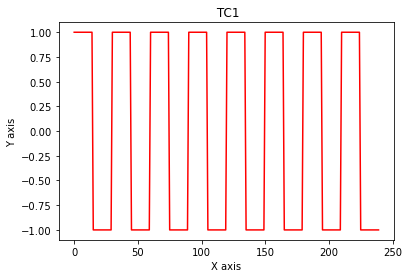

In [8]:
current_T1 = TC_generator(0,240, AV,IV, duration_of_ones)
current_T1 = np.array(current_T1)
standardized_current_T1= [(current_T1[i] - current_T1.mean())/ current_T1.std() for i in range(0, N)]
# data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC1")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T1, color ="red")
plt.show()

## T2

1


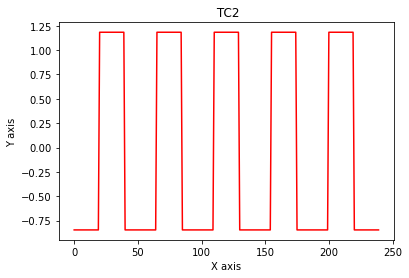

In [9]:
scaler = StandardScaler()
current_T2 = TC_generator(1, N, AV,IV, duration_of_ones)
current_T2 = np.array(current_T2)
standardized_current_T2=  (current_T2 - np.mean(current_T2)) / np.std(current_T2)
# standardized_current_T2 = scaler.fit_transform(np.array(current_T2))
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
print(current_T2[30])
plt.title(" TC2")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T2, color ="red")
plt.show()

## T3

0


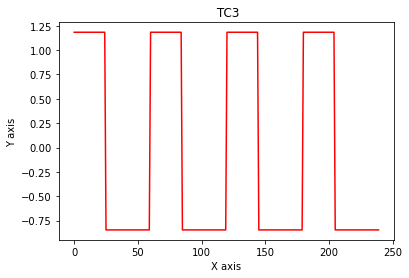

In [10]:
current_T3 = TC_generator(2, 240, AV,IV, duration_of_ones)
current_T3 = np.array(current_T3)
standardized_current_T3 = [(current_T3[i] - current_T3.mean())/ current_T3.std() for i in range(0, N)]
 # data to be plotted
print(current_T3[30])
x = [i for i in range(0, N)]
# plotting
plt.title(" TC3")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T3, color ="red")
plt.show()

## T4

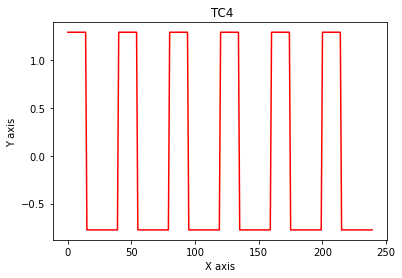

In [11]:
current_T4 = TC_generator(3, 240, AV,IV, duration_of_ones)
current_T4 = np.array(current_T4)
standardized_current_T4= [(current_T4[i] - current_T4.mean())/ current_T4.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC4")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T4, color ="red")
plt.show()

## T5

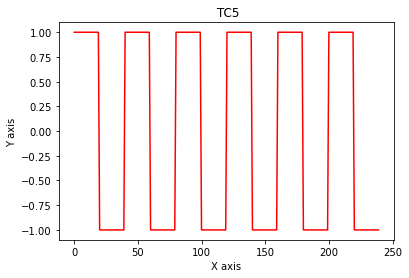

In [12]:
current_T5 = TC_generator(4, 240, AV,IV, duration_of_ones)
current_T5 = np.array(current_T5)
standardized_current_T5= [(current_T5[i] - current_T5.mean())/ current_T5.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC5")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T5, color ="red")
plt.show()

## T6

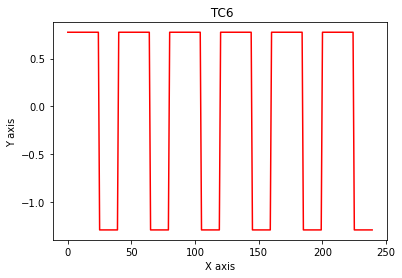

In [13]:
current_T6 = TC_generator(5, 240, AV,IV, duration_of_ones)
current_T6 = np.array(current_T6)
standardized_current_T6= [(current_T6[i] - current_T6.mean())/ current_T6.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC6")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T6, color ="red")
plt.show()

In [14]:
current_T6.mean()

0.625

### For difference TCs, they might not center around the origin after dividing the l_2 norm, it makes the comparsions between different TCs harder.

# 1.2 

### Create the dataframe

In [15]:
data = {
    "T_1":  standardized_current_T1,
    "T_2":  standardized_current_T2,
    "T_3":  standardized_current_T3,
    "T_4":  standardized_current_T4,
    "T_5":  standardized_current_T5, 
    "T_6":  standardized_current_T6,
}

In [16]:
data_frame_time_courses = pd.DataFrame(data)
data_frame_time_courses.head(10)

,T_1,T_2,T_3,T_4,T_5,T_6
0,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
1,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
2,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
3,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
4,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
5,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
6,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
7,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
8,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
9,1.0,-0.845154,1.183216,1.290994,1.0,0.774597


In [17]:
data_frame_time_courses.describe()

,T_1,T_2,T_3,T_4,T_5,T_6
count,240.00000,2.400000e+02,2.400000e+02,2.400000e+02,240.00000,2.400000e+02
mean,0.00000,5.643634e-17,-2.396231e-16,2.701543e-16,0.00000,-1.794861e-16
std,1.00209,1.002090e+00,1.002090e+00,1.002090e+00,1.00209,1.002090e+00
min,-1.00000,-8.451543e-01,-8.451543e-01,-7.745967e-01,-1.00000,-1.290994e+00
25%,-1.00000,-8.451543e-01,-8.451543e-01,-7.745967e-01,-1.00000,-1.290994e+00
50%,0.00000,-8.451543e-01,-8.451543e-01,-7.745967e-01,0.00000,7.745967e-01
75%,1.00000,1.183216e+00,1.183216e+00,1.290994e+00,1.00000,7.745967e-01
max,1.00000,1.183216e+00,1.183216e+00,1.290994e+00,1.00000,7.745967e-01


In [18]:
result = data_frame_time_courses.corr()

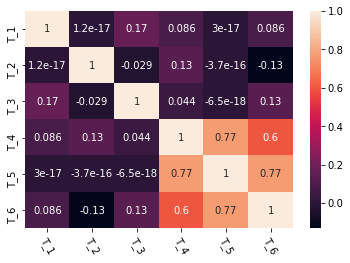

In [19]:
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=data_frame_time_courses.columns, xticklabels = data_frame_time_courses.columns)
plt.xticks(rotation=300)
plt.show()

### TCs with the same onset arrival vector are highly correlated, despite the fact that they have different duration of ones.

# 1.3

In [20]:
slice_1 = np.zeros((21,21))
slice_1[2-1:6,2-1:6] = 1

In [21]:
slice_2 = np.zeros((21,21))
slice_2[2-1:6,15-1:19] = 1

In [22]:
slice_3 = np.zeros((21,21))
slice_3[8-1:13,2-1:6] = 1

In [23]:
slice_4 = np.zeros((21,21))
slice_4[8-1:13,15-1:19] = 1

In [24]:
slice_5 = np.zeros((21,21))
slice_5[15-1:19,2-1:6] = 1

In [25]:
slice_6 = np.zeros((21,21))
slice_6[15-1:19,15-1:19] = 1

In [26]:
output_array = np.stack((slice_1.transpose(),slice_2.transpose(),slice_3.transpose(),slice_4.transpose(),slice_5.transpose(),slice_6.transpose(),), axis = 0)

In [27]:
output_array.shape

(6, 21, 21)

SM1


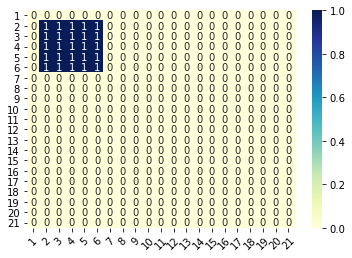

SM2


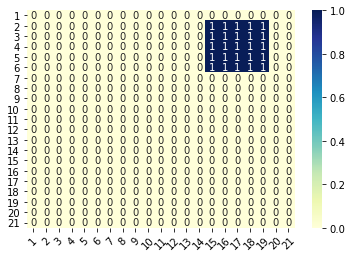

SM3


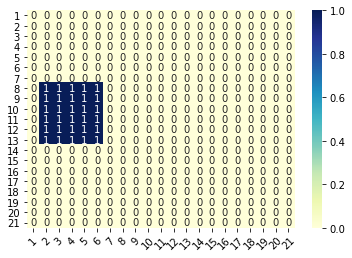

SM4


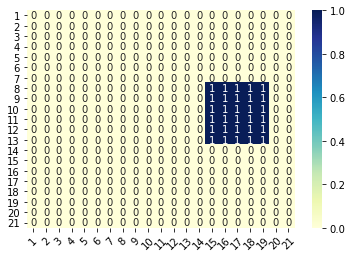

SM5


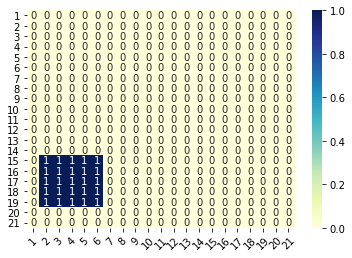

SM6


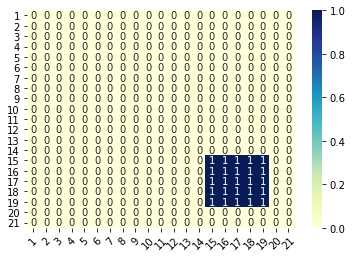

In [28]:
name_list = ['SM1','SM2','SM3','SM4','SM5','SM6']
slices = [slice_1,slice_2,slice_3,slice_4,slice_5,slice_6]
axis = [i+1 for i in range(0,21)]
for name, SM in zip(name_list, slices):
    print(name)
    heatmap  = sns.heatmap(SM, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu")
    plt.xticks(rotation=45)
    plt.show()

In [29]:
SMs = np.reshape(output_array , (6,441))
print(SMs[0][25:35])

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
 SMs.shape

(6, 441)

In [31]:
result = np.corrcoef(SMs)

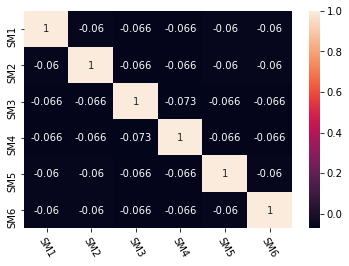

In [32]:
lst = ["SM1","SM2","SM3","SM4","SM5","SM6"]
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=lst, xticklabels = lst)
plt.xticks(rotation=300)
plt.show()

### From CM above, it seems to suggest that the SMs are independent of each other. All values on those slices lie in the same range of values, it either takes 0 or 1, so it is unnecessary to standardize them.

## 1.4

In [33]:
import math
noise_TC = np.random.normal(loc = 0.0, scale = 0.5, size = (6, 240)) 
noise_SM = np.random.normal(loc = 0.0, scale = math.sqrt(0.015), size = (6,441)) 

In [34]:
noise_TC.shape

(6, 240)

In [35]:
print(noise_TC)

[[ 0.09147103 -0.6641     -0.61158183 ...  0.52394778 -0.19696108
  -0.41547061]
 [-0.44807222 -0.48275574 -0.57758321 ...  0.09782062  0.57789342
  -0.70716044]
 [ 0.18763786 -0.19826431  0.81174589 ...  0.59370376  0.68361102
  -1.03821261]
 [-0.07864652  0.12968651 -0.03039262 ...  0.61913917 -0.50156611
  -0.13939432]
 [-0.80801839 -0.51301853 -0.74969001 ...  0.61058096 -0.15861433
  -0.0198029 ]
 [-1.0520512  -0.29840901  0.43133817 ...  0.78502996 -0.2344311
  -0.50872035]]


In [36]:
noise_SM.shape

(6, 441)

## For time courses noise:

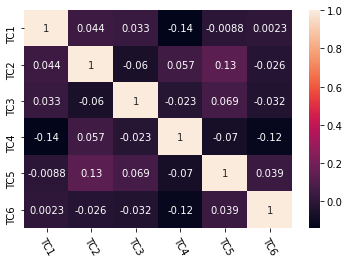

In [37]:
result = np.corrcoef(noise_TC)
TC = ["TC1","TC2","TC3","TC4","TC5","TC6"]
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True, yticklabels=TC, xticklabels = TC)
plt.xticks(rotation=300)
plt.show()

## The noise sources are not correlated

## The histograms of TC noise sources:

TC1


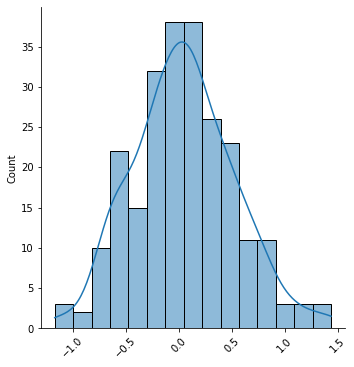

TC2


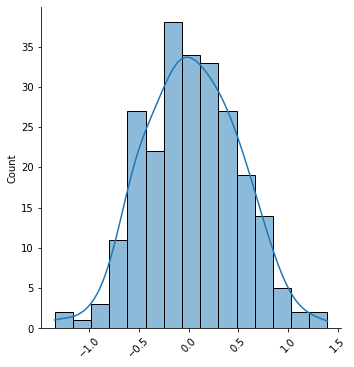

TC3


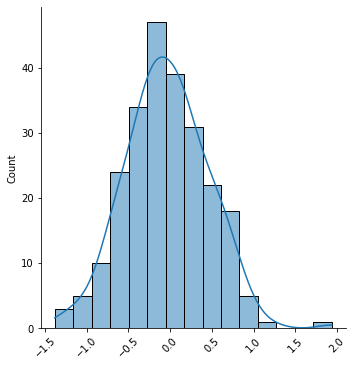

TC4


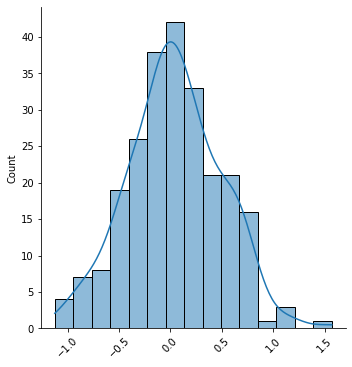

TC5


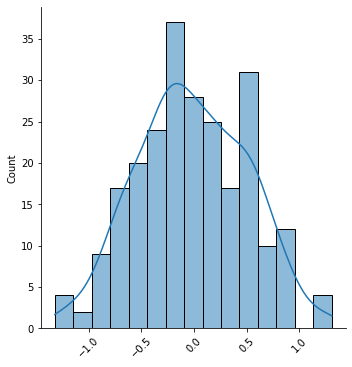

TC6


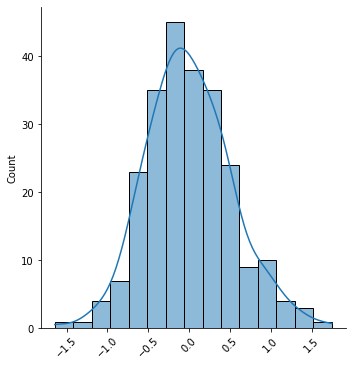

In [38]:
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
slices = [noise_TC[0],noise_TC[1], noise_TC[2],noise_TC[3],noise_TC[4],noise_TC[5]]
axis = [i+1 for i in range(0,21)]
for name, TC in zip(name_list, slices):
    print(name)
    heatmap  = sns.displot(TC, kde = True,bins = 15)
    plt.xticks(rotation=45)
    plt.show()

### Yes, the mean and standard deviations are roughly following the normal distribution with parameters specified.

## For Spatial maps noise:

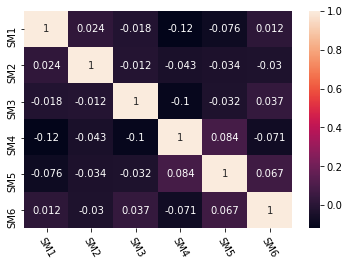

In [39]:
result = np.corrcoef(noise_SM)
SM = ["SM1","SM2","SM3","SM4","SM5","SM6"]
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=SM, xticklabels = SM)
plt.xticks(rotation=300)
plt.show()

## The noise sources are not correlated

## The histograms of SM noise sources:


SM1


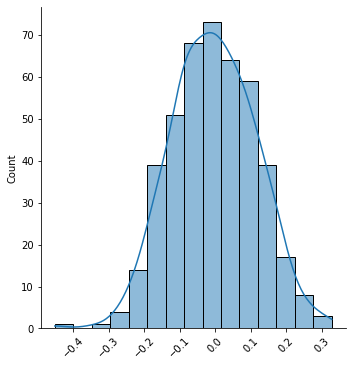

SM2


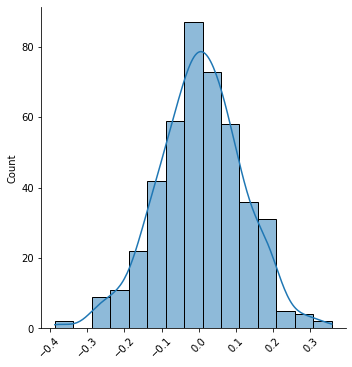

SM3


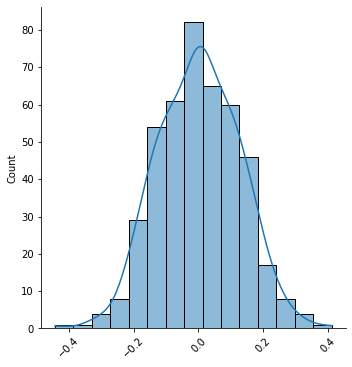

SM4


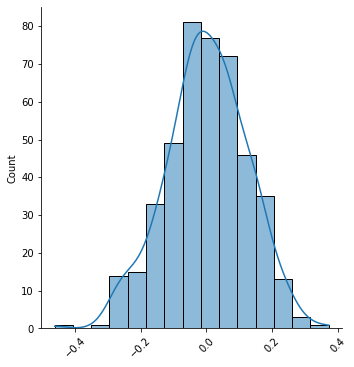

SM5


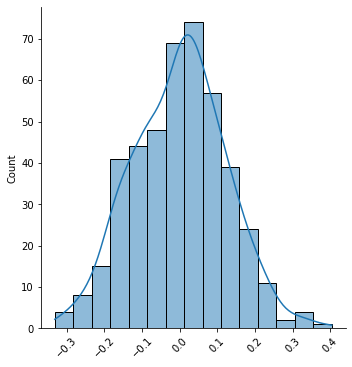

SM6


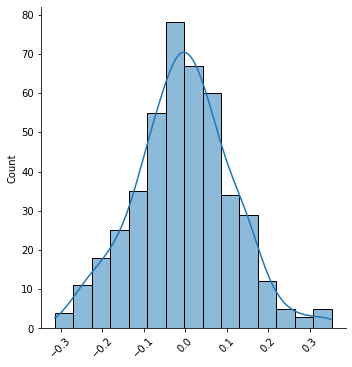

In [40]:
name_list  = ["SM1","SM2","SM3","SM4","SM5","SM6"]
slices = [noise_SM[0],noise_SM[1], noise_SM[2],noise_SM[3],noise_SM[4],noise_SM[5]]
axis = [i+1 for i in range(0,21)]
for name, SM in zip(name_list, slices):
    print(name)
    heatmap  = sns.displot(SM, kde = True,bins = 15)
    plt.xticks(rotation=45)
    plt.show()

# Plot the entire noise dataset for temporal and Spatial sources

Text(0.5, 1.0, 'Histogram of Noise dataset for Spatial Sources')

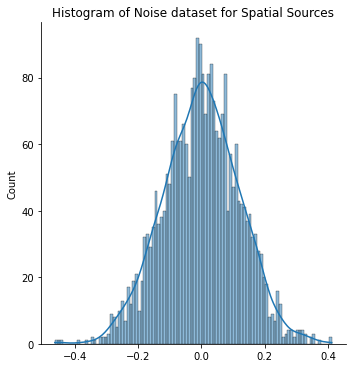

In [41]:

plot = sns.displot(list(np.reshape(noise_SM, (1,2646))[0]), bins = 100, kde = True)
plt.title("Histogram of Noise dataset for Spatial Sources")

Text(0.5, 1.0, 'Histogram of Noise dataset for Temporal Sources')

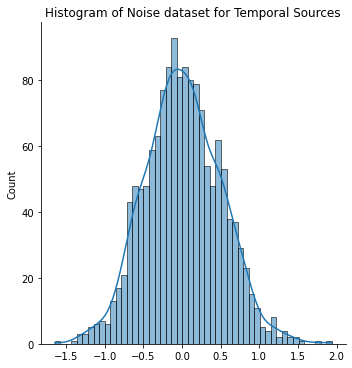

In [42]:
plot2 = sns.displot(list(np.reshape(noise_TC, (1,1440))[0]), bins = 50, kde = True)
plt.title("Histogram of Noise dataset for Temporal Sources")

### Yes, the mean and standard deviations are roughly following the normal distribution with parameters specified.

In [43]:
product = np.matmul(noise_TC.transpose(),noise_SM)

## Correlation between $\Gamma_s\Gamma_t$ and $V$ number of variables

In [44]:
product = np.matmul(noise_TC.transpose(),noise_SM)
print(product.shape)

(240, 441)


# We choose the first 20 variables to see if they have any correlations

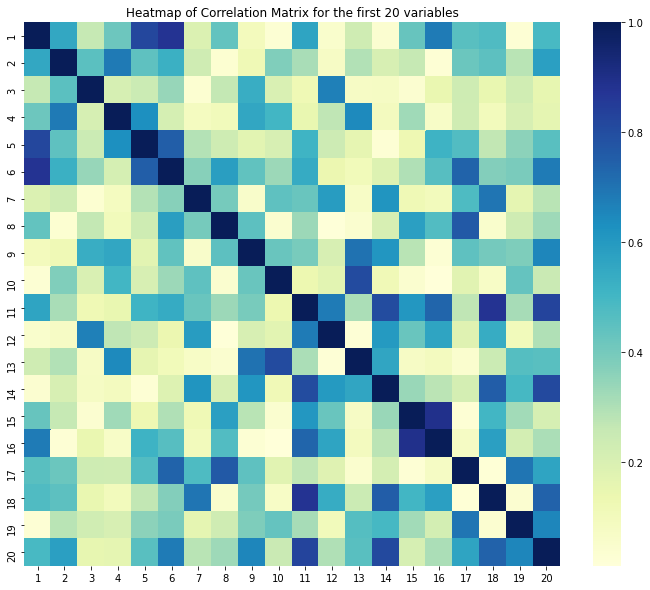

In [45]:
plot = plt.figure(figsize=(12,10))
x = [i + 1 for i in range(0,20)]
result = np.corrcoef(np.array(product[0:20]))
plt.title("Heatmap of Correlation Matrix for the first 20 variables")
heatmap  = sns.heatmap(abs(result), annot=False,yticklabels=x, xticklabels = x,cmap="YlGnBu" )

## From the Heatmap of the correlation matrix, we can see that in general $\Gamma_s\Gamma_t$ are moderately correlated either negatively or positively across the $V$ number of variables. 

## 1.5

In [46]:
data_frame_time_courses.shape

(240, 6)

In [47]:
noise_TC.transpose().shape

(240, 6)

In [48]:
print(SMs.shape)
print(noise_SM.shape)

(6, 441)
(6, 441)


In [49]:
X = np.matmul((data_frame_time_courses + noise_TC.transpose()),(SMs + noise_SM))
print(X.shape)

(240, 441)


# Random Time Series Visualization with 105 random time series choosen

In [50]:
import time
rng = np.random.default_rng(int(time.time()))
index_random_selected = rng.integers(low=0, high=441,size = 105)
print(index_random_selected)

[262 357 143 142 231 145 425 280 255 165  76   1 275 128 295  44 127  44
 182 130  35 336 146 399 129 160  81 164 342 336 298 169  27  72 203 202
 290  52 428 417 289  89 406 383 413  79 295 171 275 374  26  79  55 269
  81 328 338 227 261 125 313 319   6  90  84 108 227 132 278  74   2 192
 244  49 380 378 415 363 194 368 334 286 270 399 232 347 150 353 131 304
 100 388 250 379   0 284 390 212 146  37  52  41 192 327 413]


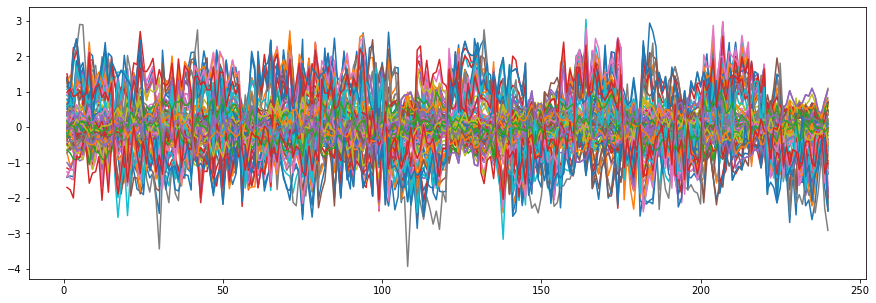

In [51]:
x  =[ i + 1 for i in range(0,240)]
fig = plt.figure(figsize = (15,5))
plot = plt.plot(x, X[index_random_selected])

# Visualization of variances in the histogram for 441 variables

In [52]:
std_441 = np.array(X.describe())[2]


### Variance

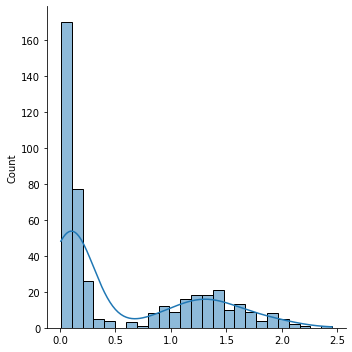

In [53]:
var_441 =  [ i*i  for i in std_441]
sns.displot(var_441, bins = 25, kde = True)

### Standard Deviation

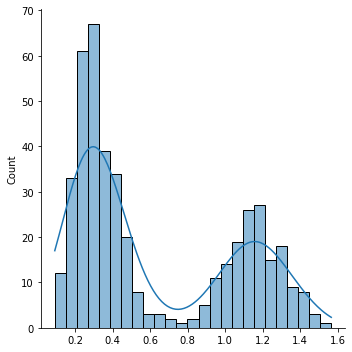

In [54]:
sns.displot(std_441, bins = 25, kde = True)

#### These terms can not exist when we are trying to fit the model where the design matrix itself is supposed to be already fixed upon finishing of collecting the samples, and not variation incur for those samples, but when we are trying to create the dataset, these terms exist as a consequence of adding the noise to TCs and SMs.

#### From the plot of the variances of 441 variables, we can see that the empirical distribution is bimodal, which is correspond to the number of noise terms we add when creating the synthetic dataset.

## Standardizing the dataset X

In [55]:
Standardized_X  = X.copy()
for column in X.columns:
    Standardized_X[column] = (X[column] - X[column].mean())/X[column].std()


In [56]:
Standardized_X.shape

(240, 441)

In [57]:
Standardized_X.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.020886,-0.387768,1.908658,0.467657,-0.676798,0.165374,-0.264955,-0.172356,0.335387,-1.119507,...,-0.314901,0.561337,0.288103,1.350976,0.499430,-1.023102,1.924110,1.403047,-0.497957,-1.438843
1,0.889814,0.117884,1.862992,0.284582,-0.509950,0.362815,0.316295,-0.286064,-0.276607,-1.024191,...,-0.657145,0.904195,0.729181,0.998980,-0.247801,-1.235452,1.453546,0.886859,-0.541930,-1.316895
2,1.178117,0.620773,1.796030,-0.434681,-1.509022,0.682738,-0.337174,-0.948483,-0.482615,-1.648609,...,0.061556,1.418936,1.226814,0.843178,-0.024778,-1.889387,1.601602,1.323882,-0.631300,-1.791526
3,0.282512,0.140808,0.551280,0.290438,-2.008268,1.588456,-0.758326,0.250238,1.247923,-2.225364,...,0.117446,1.561653,1.686563,1.811782,-0.155595,-1.310547,2.055265,2.148580,-0.232757,-1.361019
4,1.043671,0.195723,0.406152,0.158458,-1.762139,1.525382,-0.352771,0.161172,0.445368,-1.762185,...,0.272205,1.387978,1.913994,1.183426,-0.586897,-1.260448,1.492954,1.560271,-0.703723,-1.254151


In [58]:
Standardized_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,...,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,7.540265e-17,-1.850372e-17,-2.775558e-18,5.504856e-17,3.515706e-17,1.332268e-16,1.850372e-18,4.579670e-17,8.604228e-17,-1.498801e-16,...,-4.533411e-17,-1.480297e-17,-1.942890e-17,1.137979e-16,-7.216450e-17,2.590520e-17,6.476301e-18,1.452542e-16,-4.615087e-18,-4.805184e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.500633e+00,-2.169820e+00,-2.732571e+00,-2.654430e+00,-2.194598e+00,-2.258273e+00,-2.548977e+00,-2.956658e+00,-2.624541e+00,-2.405595e+00,...,-2.008420e+00,-2.303712e+00,-2.201893e+00,-2.208193e+00,-2.354464e+00,-2.722620e+00,-2.485976e+00,-2.596185e+00,-2.461294e+00,-2.183377e+00
25%,-6.093179e-01,-7.988395e-01,-7.130129e-01,-7.085801e-01,-7.869173e-01,-7.765790e-01,-6.762201e-01,-7.567339e-01,-6.798978e-01,-6.438257e-01,...,-6.835781e-01,-6.812307e-01,-9.327304e-01,-7.760820e-01,-6.741788e-01,-7.371122e-01,-7.309639e-01,-6.604815e-01,-6.439165e-01,-7.307598e-01
50%,8.124750e-02,7.397038e-02,2.939785e-02,6.564242e-02,1.636692e-02,-1.026678e-01,-1.593316e-02,-4.803320e-03,-2.379439e-02,-4.429315e-02,...,-9.575272e-02,-3.357814e-02,2.667745e-01,-1.120771e-01,3.190662e-02,3.642435e-02,-1.647981e-01,-1.027248e-02,-1.637150e-02,-8.898676e-02
75%,6.844630e-01,6.369085e-01,7.136198e-01,6.367129e-01,7.358892e-01,8.168432e-01,6.581591e-01,5.991246e-01,7.572794e-01,8.118272e-01,...,6.589588e-01,7.139746e-01,8.101670e-01,7.645890e-01,7.787729e-01,7.543007e-01,6.793382e-01,7.591902e-01,7.448863e-01,6.967969e-01
max,2.539865e+00,2.355835e+00,2.071265e+00,2.750723e+00,2.447983e+00,2.254299e+00,2.199859e+00,2.477361e+00,2.341009e+00,2.137514e+00,...,3.002773e+00,2.506342e+00,1.941007e+00,2.438892e+00,2.305754e+00,2.582612e+00,2.883313e+00,2.239430e+00,2.668376e+00,2.337951e+00


# Question 2

## 2.1

In [59]:
DTD = np.matmul(data_frame_time_courses.transpose(),data_frame_time_courses)
DT_standardised_X = np.matmul(data_frame_time_courses.transpose(),Standardized_X)

In [60]:
Standardized_X.shape

(240, 441)

In [61]:
DTD

,0,1,2,3,4,5
T_1,2.400000e+02,1.776357e-15,4.056740e+01,20.655911,0.000000e+00,20.655911
T_2,1.776357e-15,2.400000e+02,-6.857143e+00,31.423376,4.218847e-15,-31.423376
T_3,4.056740e+01,-6.857143e+00,2.400000e+02,10.474459,-2.886580e-15,31.423376
T_4,2.065591e+01,3.142338e+01,1.047446e+01,240.000000,1.859032e+02,144.000000
T_5,0.000000e+00,4.218847e-15,-2.886580e-15,185.903201,2.400000e+02,185.903201
T_6,2.065591e+01,-3.142338e+01,3.142338e+01,144.000000,1.859032e+02,240.000000


In [62]:
A_LSR = np.matmul(np.linalg.inv(DTD), DT_standardised_X)

In [63]:
A_LSR = abs(A_LSR)

In [64]:
D_LSR  = np.matmul(Standardized_X,A_LSR.transpose())

In [65]:
D_LSR

,0,1,2,3,4,5
0,24.091233,-21.555429,27.911536,27.076681,12.472106,0.130597
1,11.224219,-24.350328,19.949729,30.229220,17.306644,12.878200
2,13.362488,-27.215990,38.949507,28.249440,12.890831,20.216478
3,32.874927,-6.634820,46.940745,33.818059,41.125231,26.477283
4,22.479948,-9.323036,32.883713,32.552794,32.212756,36.285025
...,...,...,...,...,...,...
235,-35.925218,-11.215640,-26.930171,-34.026677,-30.620776,-30.453494
236,-17.489370,-3.398188,-18.534267,-13.914868,-13.896152,-20.506851
237,-12.998785,-14.086391,-8.063118,-8.757720,-9.801703,-10.259307
238,-29.232445,-5.211810,-9.296012,-35.121465,-27.954002,-31.640848


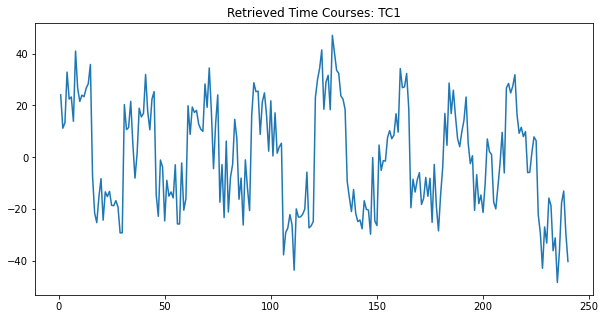

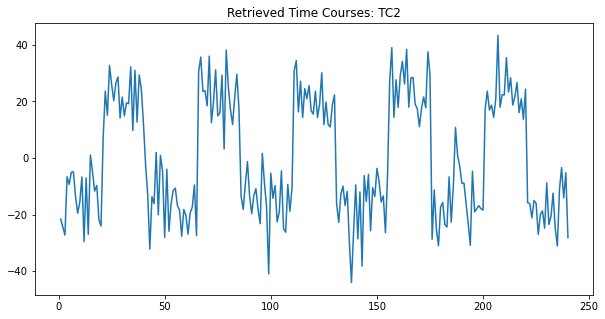

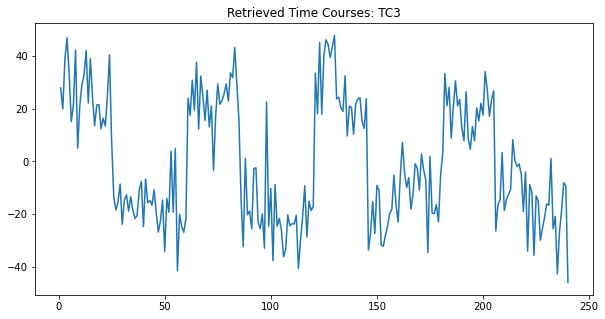

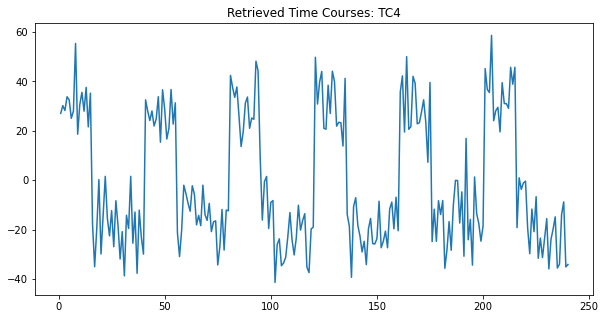

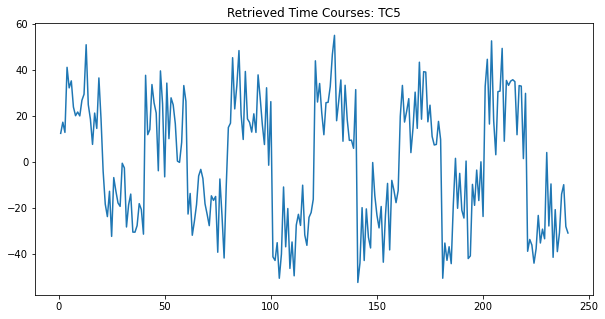

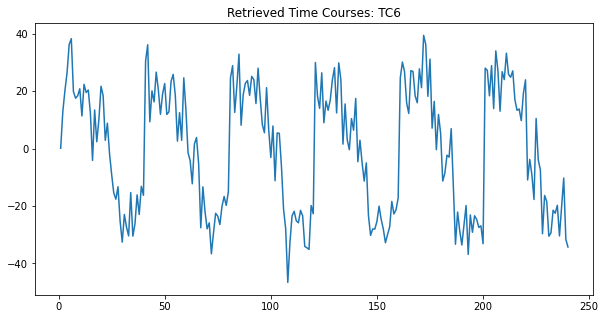

In [66]:
x = [i+1 for i in range(0,240)]
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
for name, index in zip(name_list, [i for i in range(6)]):
    fig = plt.figure(figsize = (10,5))
    plt.title(r"Retrieved Time Courses: " + name)
    plot = plt.plot(x, D_LSR[index])
    

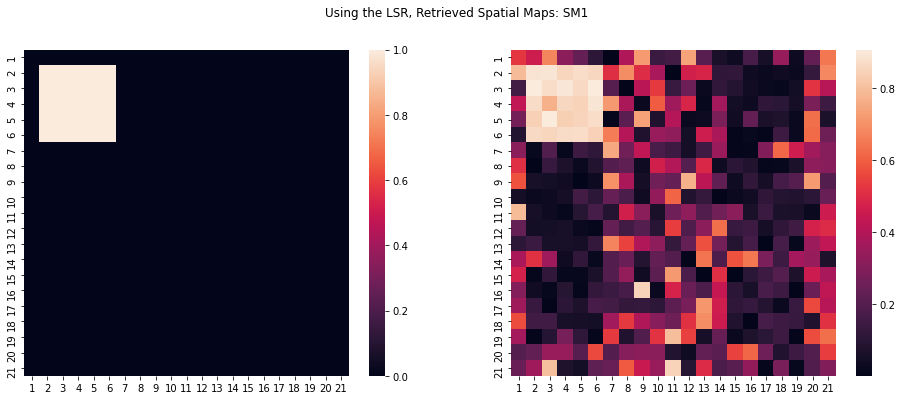

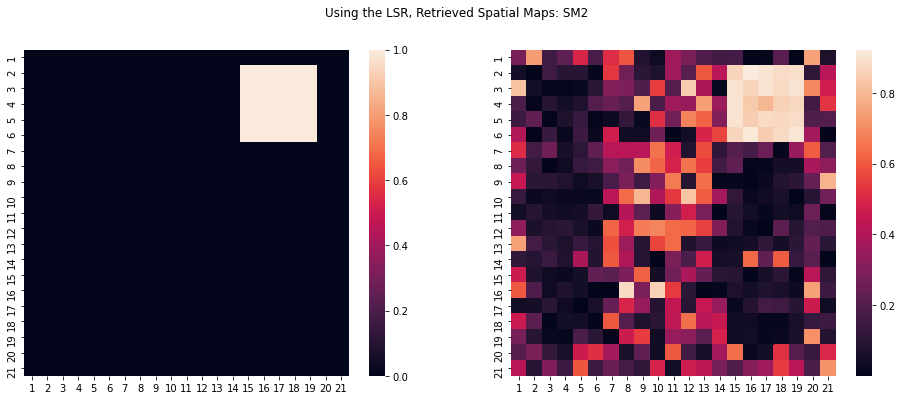

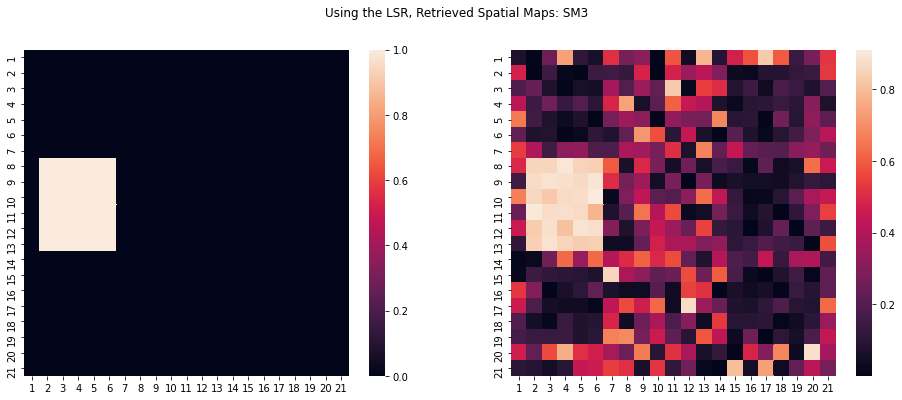

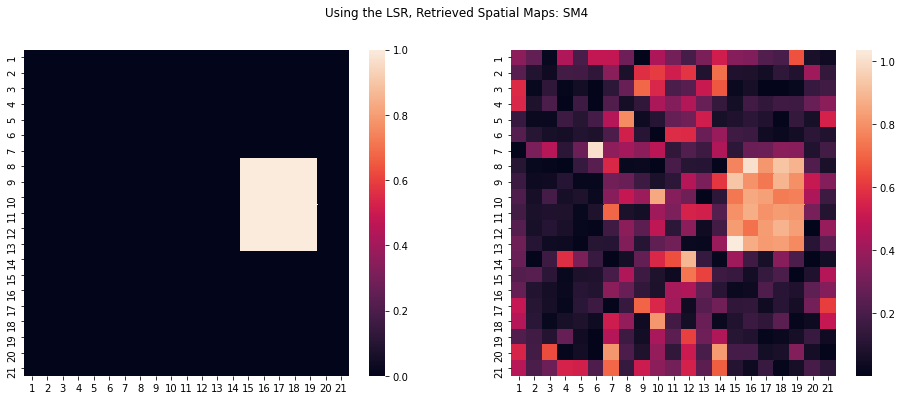

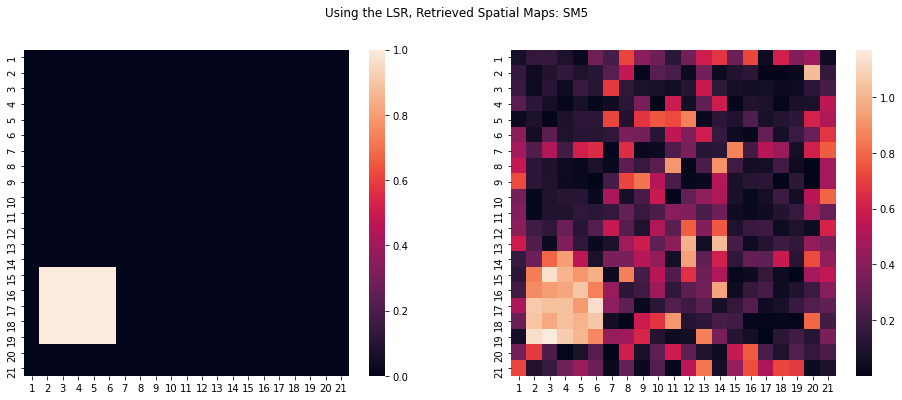

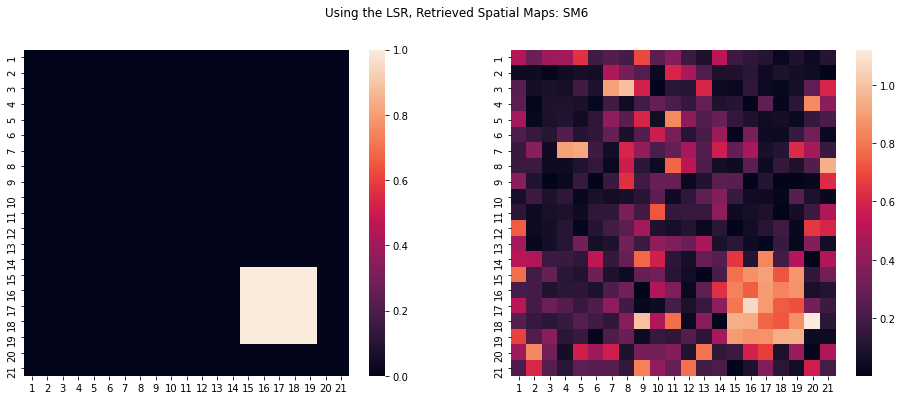

In [67]:
x = [i+1 for i in range(0,21)]
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for name, index in zip(name_list, [i for i in range(6)]):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    fig.suptitle(r"Using the LSR, Retrieved Spatial Maps: " + name)
    one_map = np.reshape(np.array(A_LSR.iloc[index,:]), (21,21)).transpose()
    sns.heatmap(one_map,ax = ax2,yticklabels=x,xticklabels=x)
    sns.heatmap(np.reshape(SMs[index], (21,21)).transpose(),yticklabels=x,xticklabels=x,ax =ax1)
    fig.show()

## Scatter plot between 30th Columns of Standardized X and 3rd Column of D_LSR

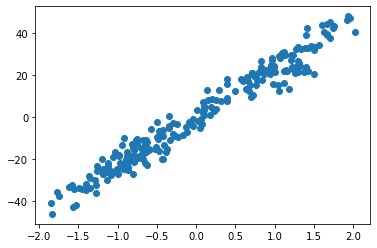

In [68]:
plot  = plt.scatter(Standardized_X[29],D_LSR[2])

In [69]:
np.corrcoef(Standardized_X[29],D_LSR[2])

array([[1.        , 0.98088931],
       [0.98088931, 1.        ]])

## Scatter plot between 30th Columns of Standardized X and 4rd Column of D_LSR

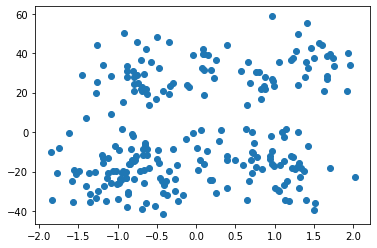

In [70]:
plt.scatter(Standardized_X[29],D_LSR[3])

In [71]:
np.corrcoef(Standardized_X[29],D_LSR[3])


array([[1.        , 0.23532325],
       [0.23532325, 1.        ]])

### Only the third temporal source contributed to this element on the spatial map as only the third spatial map turn out to be 1 at this pixel values, which will preserve the effect from the temporal sources  after taking the dot product in the matrix multiplication. 

## 2.2

In [72]:
A_LSR.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.525716,0.793866,0.161792,0.431609,0.270878,0.083584,0.313356,0.513511,0.581230,0.051833,...,0.502882,0.431895,0.069149,0.377148,0.428111,0.409816,0.515633,0.631094,0.538907,0.295792
1,0.283036,0.053895,0.822606,0.182590,0.151627,0.405367,0.510581,0.262282,0.443622,0.131677,...,0.188334,0.104495,0.002594,0.113723,0.150928,0.032876,0.147263,0.089060,0.499105,0.715145
2,0.068594,0.473649,0.185452,0.417652,0.658062,0.230632,0.538831,0.491646,0.151994,0.667855,...,0.148477,0.573203,0.159263,0.226616,0.227305,0.627292,0.346281,0.433558,0.367103,0.272553
3,0.363935,0.240093,0.570308,0.561678,0.152154,0.229712,0.010981,0.109359,0.159883,0.213167,...,0.393349,0.251369,0.053000,0.459536,0.346518,0.619423,0.506196,0.042868,0.011187,0.121518
4,0.077670,0.162232,0.172776,0.270768,0.037668,0.408673,0.475535,0.562537,0.728089,0.348708,...,0.620855,0.358917,0.425265,0.557719,0.398566,0.283744,0.208225,0.363160,0.230162,0.090965


In [73]:
# Generate the possible values for lambda
lambda_values = np.linspace(0,1,10000)*441

In [74]:
# storing the MSE results for differernt lambda values
identity_matrix = np.identity(6)
MSE_results = []
for values in lambda_values: 
    A_RR = np.matmul(np.linalg.inv(DTD + values*identity_matrix),DT_standardised_X)
    D_RR = np.matmul(Standardized_X,A_RR.transpose())
    X_hat = np.matmul(D_RR, A_RR)
    MSE = mean_squared_error(Standardized_X, X_hat)
    MSE_results.append(MSE)
MSE_results = np.array(MSE_results)

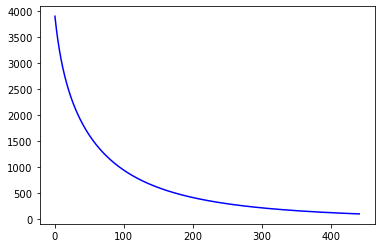

In [75]:
#Plot the graph of MSE against Lambda values.
plt.plot(lambda_values, MSE_results, color ="blue")
plt.show()

In [76]:
# Choose the optimal value that minimize the value of MSE
optimal_lambda = lambda_values[np.argmin(MSE_results)]

In [77]:
# Generate the best A_RR and D_RR and X_hat
A_RR = np.matmul(np.linalg.inv(DTD + optimal_lambda*identity_matrix),DT_standardised_X)
D_RR = np.matmul(Standardized_X,A_RR.transpose())
X_hat = np.matmul(D_RR, A_RR)

In [78]:
corr_result_LSR = []
for i in range(6):
    correction = abs(np.corrcoef(D_LSR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_LSR.append(correction)
corr_result_LSR

[0.8340300060181061,
 0.9079276831217753,
 0.8746225480863203,
 0.9155774484312599,
 0.8714219792481657,
 0.8683725000480506]

In [79]:
corr_result_RR = []
for i in range(6):
    correction = abs(np.corrcoef(D_RR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_RR.append(correction)
corr_result_RR

[0.8989616118882752,
 0.9104047188481941,
 0.8998030527248442,
 0.9082347797648781,
 0.9278863338216471,
 0.888200779470734]

In [80]:
print(sum(corr_result_LSR) < sum(corr_result_RR))


True


In [81]:
print("LSR:")
print(sum(corr_result_LSR))
print("RR:")
print(sum(corr_result_RR))

LSR:
5.271952164953678
RR:
5.4334912765185726


# Plot the graphs of respective first vectors from $A_{RR}$ and $A_{LSR}$, when $\lambda = 1000$

In [82]:
A_RR_1000 = np.matmul(np.linalg.inv(DTD + 1000*441*identity_matrix),DT_standardised_X)
D_RR_1000 = np.matmul(Standardized_X,A_RR.transpose())
X_hat_1000 = np.matmul(D_RR, A_RR)

In [83]:
x = [i + 1 for i in range(0,21)]

<AxesSubplot:title={'center':'RR first Spatial map'}>

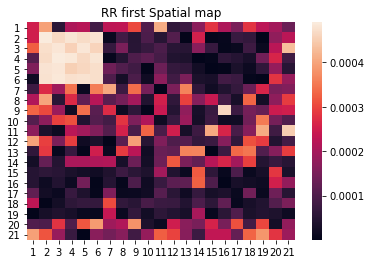

In [84]:
plt.title("RR first Spatial map")
sns.heatmap(abs(np.reshape(np.array(A_RR_1000.iloc[0,:]),(21,21))),yticklabels=x,xticklabels=x)

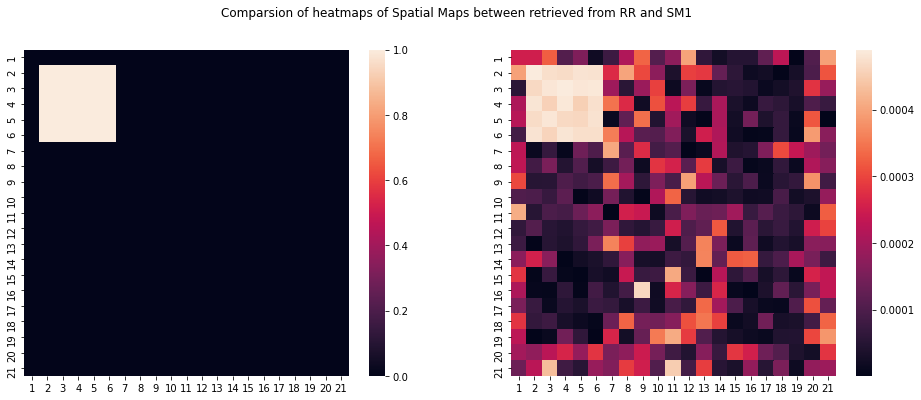

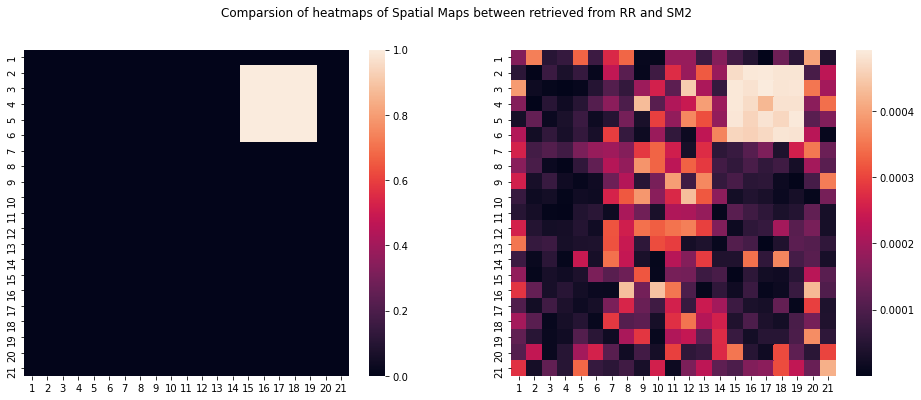

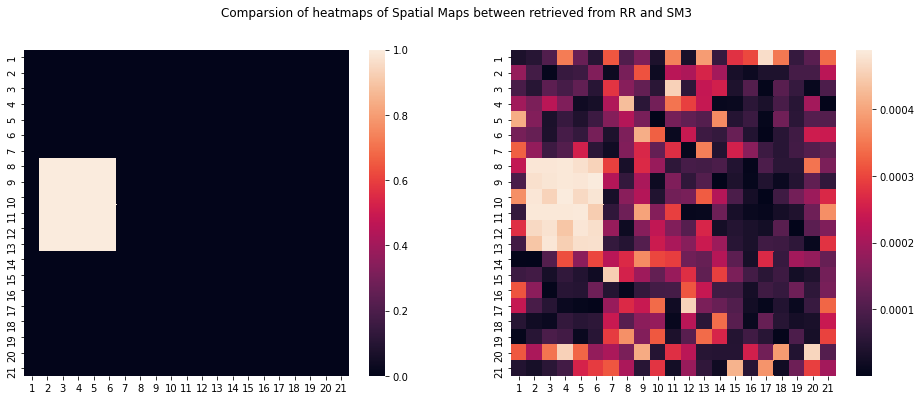

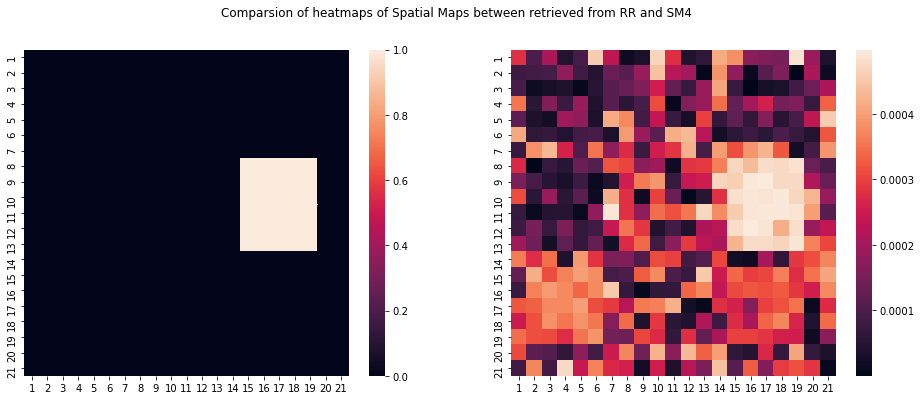

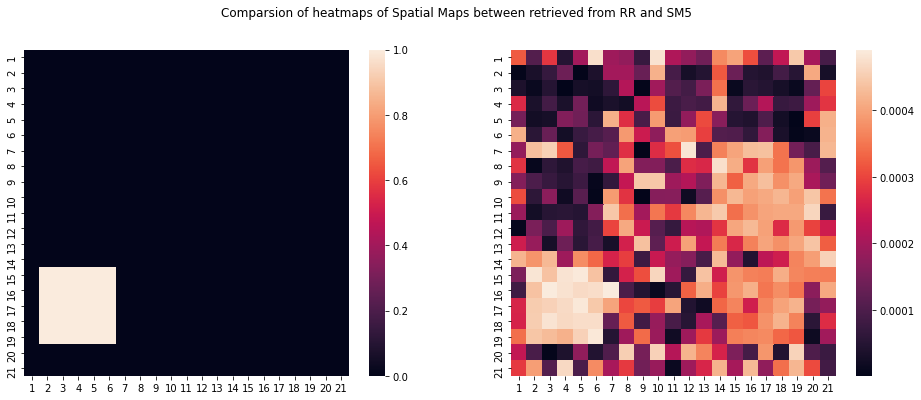

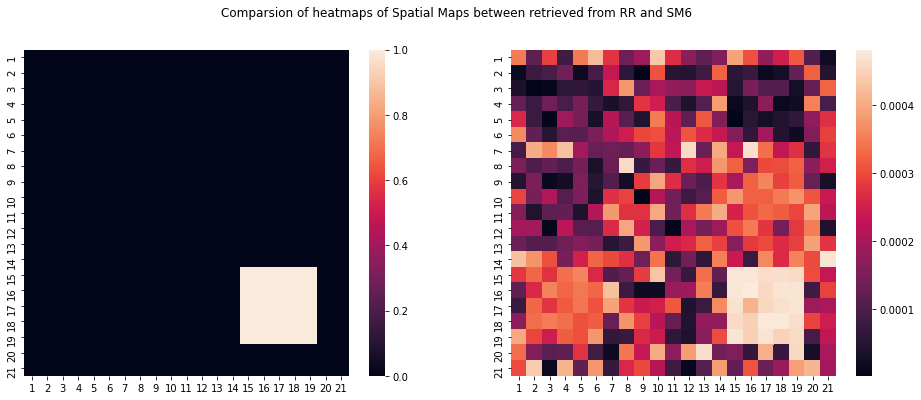

In [85]:
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    fig.suptitle("Comparsion of heatmaps of Spatial Maps between retrieved from RR and "  +name_list[i])
    sns.heatmap(np.reshape(SMs[i], (21,21)).transpose(),yticklabels=x,xticklabels=x,ax =ax1)
    sns.heatmap(abs(np.reshape(np.array(A_RR_1000.iloc[i,:]),(21,21))).transpose(),yticklabels=x,xticklabels=x,ax =ax2)
    fig.show()

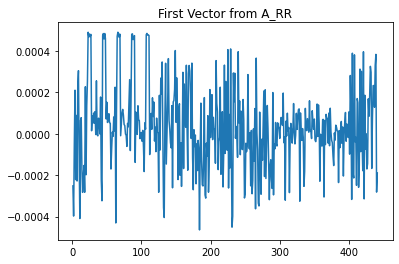

In [86]:
plt.title("First Vector from A_RR")
plt.plot([i+1 for i in range(441)], np.array(A_RR_1000.iloc[0,:]))

<AxesSubplot:title={'center':'LSR first Spatial map'}>

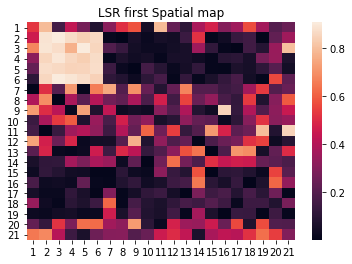

In [87]:
plt.title("LSR first Spatial map")
sns.heatmap(np.reshape(np.array(A_LSR.iloc[0,:]),(21,21)),yticklabels=x,xticklabels=x)

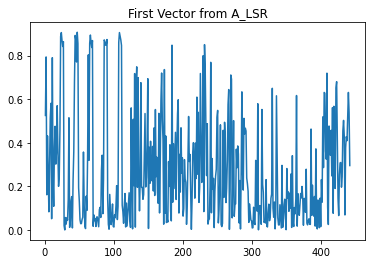

In [88]:
plt.title("First Vector from A_LSR")
plt.plot([i+1 for i in range(441)], np.array(A_LSR.iloc[0,:]))

## Yes, the pixel values of the spatial map from $A_{RR}$ are shrinking to zeros.

## 2.3

In [89]:
from sklearn import linear_model
rou_values = np.linspace(0,1,21)
print(rou_values)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [90]:
MSE_LR_results = []
A_LR_results = []
D_LR_results = []
for i in rou_values:
    clf = linear_model.Lasso(alpha=i)
    clf.fit(data_frame_time_courses, Standardized_X)
    A_LR = clf.coef_.transpose()
    D_LR = np.matmul(Standardized_X,A_LR.transpose())
    MSE = mean_squared_error(Standardized_X, np.matmul(D_LR,A_LR))
    A_LR_results.append(A_LR)
    D_LR_results.append(D_LR)
    MSE_LR_results.append(MSE)
    

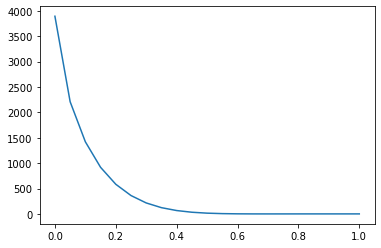

In [91]:
plt.plot(rou_values, MSE_LR_results)

In [92]:
MSE_LR_10results =[]
for k in range(10):
    noise_TC = np.random.normal(loc = 0.0, scale = 0.5, size = (6, 240)) 
    noise_SM = np.random.normal(loc = 0.0, scale = math.sqrt(0.015), size = (6,441)) 
    X = np.matmul((data_frame_time_courses + noise_TC.transpose()),(SMs + noise_SM))
    for column in X.columns:
        Standardized_X[column] = (X[column] - X[column].mean())/X[column].std()
    
    MSE_LR_results = []
    for i in rou_values:
        clf = linear_model.Lasso(alpha=i)
        clf.fit(data_frame_time_courses, Standardized_X)
        A_LR = clf.coef_.transpose()
        D_LR = np.matmul(Standardized_X,A_LR.transpose())
        MSE = mean_squared_error(Standardized_X, np.matmul(D_LR,A_LR))
        A_LR_results.append(A_LR)
        D_LR_results.append(D_LR)
        MSE_LR_results.append(MSE)
    MSE_LR_10results.append(MSE_LR_results)

    

In [93]:
MSE_LR_10results_T = np.array(MSE_LR_10results).transpose()
print(MSE_LR_10results_T.shape)

(21, 10)


In [94]:
Mean_MSE_results_for_10 = []
for i in range(21):
    Mean_MSE_results_for_10.append(MSE_LR_10results_T[i].mean())
print(Mean_MSE_results_for_10)


[3900.963788183173, 2207.786167858756, 1410.380172411101, 907.8319702464345, 574.9503210929179, 354.1522840306483, 210.6206382601963, 119.80333781509398, 64.35028928866983, 32.17481526674338, 14.650776575522354, 5.877672524883969, 2.043588148327267, 0.740476688684012, 0.553819444258812, 0.7217161291642402, 0.9008058725822773, 0.9846473791125032, 0.9958069984905931, 0.9958333333333333, 0.9958333333333333]


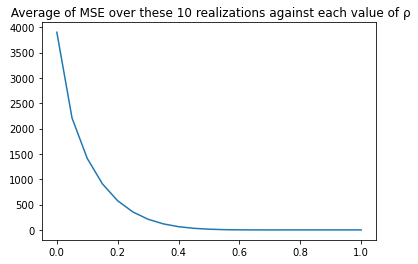

In [95]:
plt.title(" Average of MSE over these 10 realizations against each value of ρ")
plt.plot(rou_values,Mean_MSE_results_for_10)

# Too see the turning point much clear, we apply the log transformation here

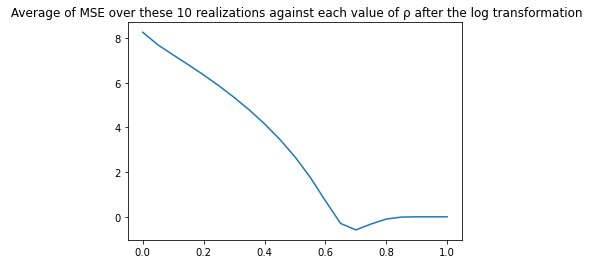

In [96]:
plt.title(" Average of MSE over these 10 realizations against each value of ρ after the log transformation")
plt.plot(rou_values,[math.log(i) for i in Mean_MSE_results_for_10])

In [97]:
optimal_rou_value = rou_values[np.argmin(Mean_MSE_results_for_10)]
print(optimal_rou_value)

0.7000000000000001


### The $\rho$ value found in this case is 0.7000 which minimize the MSE after 10 realizations, this result, in general, should be quite reliable as it is obtained upon 10 times of different realizations of noise sources.

## 2.4

In [98]:
clf = linear_model.Lasso(alpha=optimal_rou_value)
clf.fit(data_frame_time_courses, Standardized_X)
A_LR = clf.coef_.transpose()
D_LR = np.matmul(Standardized_X,A_LR.transpose())

In [99]:
print(A_LR.shape)
print(D_LR.shape)

(6, 441)
(240, 6)


## Estimate the correlation vectors

### For RR:

In [100]:
corr_result_RR_D = []
for i in range(6):
    correction = abs(np.corrcoef(D_RR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_RR_D.append(correction)
corr_result_RR_D

[0.8989616118882752,
 0.9104047188481941,
 0.8998030527248442,
 0.9082347797648781,
 0.9278863338216471,
 0.888200779470734]

In [101]:
corr_result_RR_A = []
for i in range(6):
    correction = abs(np.corrcoef(A_RR.iloc[i,:], np.array(SMs[i]))[1,0])
    corr_result_RR_A.append(correction)
corr_result_RR_A

[0.5510259449611719,
 0.5411975402572324,
 0.5728516339579977,
 0.4809562372958862,
 0.402829265452305,
 0.4666767830350624]

### For LR:

In [102]:
corr_result_LR_D = []
for i in range(6):
    correction = abs(np.corrcoef(D_LR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_LR_D.append(correction)
corr_result_LR_D

[0.9021218235952326,
 0.8852337433696985,
 0.9164322728076708,
 0.9051750398567335,
 0.9070054636213201,
 0.8899371176676177]

In [103]:
corr_result_LR_A = []
for i in range(6):
    correction = abs(np.corrcoef(A_LR[i], np.array(SMs[i]))[1,0])
    corr_result_LR_A.append(correction)
corr_result_LR_A

[0.9438995461188175,
 0.9571675462262461,
 0.9513850051699714,
 0.7997614048052324,
 0.7896394772920493,
 0.8558166190413767]

In [104]:
print(sum(corr_result_LR_D) > sum(corr_result_RR_D))

False


In [105]:
print(sum(corr_result_LR_A) > sum(corr_result_RR_A))

True


In [106]:
A_RR

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.170453,-0.264516,-0.042030,0.138121,-0.123895,0.042179,-0.137462,0.154597,0.192362,-0.045028,...,0.190109,-0.127028,0.035156,0.137804,0.153673,0.102385,0.198149,0.233094,-0.184370,-0.113730
1,-0.103579,-0.032377,-0.256518,0.097663,-0.026493,0.140143,-0.169357,0.104841,0.162773,-0.047852,...,0.027269,0.040635,-0.016233,0.068437,-0.062849,-0.024766,-0.029032,-0.036444,0.190963,0.263384
2,-0.024404,0.133878,0.059995,-0.138021,-0.251287,0.085637,-0.206697,-0.163426,0.052780,-0.233915,...,0.091823,0.182563,0.068853,0.079809,0.094959,-0.214605,0.137889,0.172933,0.087962,-0.114791
3,0.122545,-0.050057,0.070962,0.187200,-0.026197,0.176009,0.029967,0.123213,0.062707,-0.135131,...,-0.132516,0.135971,0.139906,0.199820,-0.172441,-0.143779,0.169510,0.063337,0.000032,0.017184
4,0.129712,0.012353,0.006747,0.119449,-0.051071,0.180786,0.102405,0.136840,0.091117,-0.131095,...,-0.133240,0.143690,0.198483,0.161838,-0.186250,-0.057136,0.109505,0.084396,-0.018560,-0.032848
5,0.166189,0.016145,-0.005872,0.017934,-0.135476,0.151032,0.028665,0.042246,-0.007652,-0.116365,...,0.029013,0.108902,0.218118,0.059583,-0.114324,-0.080448,0.078479,0.094694,-0.114961,-0.100745


In [107]:
D_RR

,0,1,2,3,4,5
0,21.022256,-25.921994,28.918199,17.467073,11.583144,9.997793
1,3.912848,-28.340720,20.321576,27.695912,25.760939,23.802997
2,6.787475,-30.513259,44.725148,26.257553,26.328096,35.696315
3,23.008236,-5.969688,48.011292,36.636717,40.265736,40.351028
4,13.721480,-8.940725,33.949642,39.520424,44.520056,49.639007
...,...,...,...,...,...,...
235,-30.578768,-13.754523,-23.187729,-36.527078,-36.017593,-37.478975
236,-15.544567,-5.001963,-19.170050,-17.517513,-19.896182,-26.074632
237,-11.752072,-16.695297,-5.836347,-10.044209,-9.554277,-10.070734
238,-24.297279,-6.177804,-3.329562,-39.384446,-38.897240,-37.378536


In [108]:
print(D_LR)

            0         1         2          3         4         5
0    4.699433 -5.575587  2.891470   6.096678  6.517519  4.700239
1    3.604605  0.340593  7.321566   8.675385  4.010137  7.339719
2    4.710430 -0.293218  4.331915   6.613188  5.349157  3.193603
3    5.984485 -3.537014  6.819053  11.274546  6.280592  4.349940
4    4.540902 -0.125523  3.863317   7.807730  3.044721  4.519667
..        ...       ...       ...        ...       ...       ...
235 -3.801494 -4.938640 -6.594591  -8.181084 -6.027037 -7.570816
236 -5.789202 -1.492170 -7.861301  -0.381256 -2.147593 -5.046085
237 -3.472169 -5.907640 -8.460930  -6.721413 -6.621177 -6.930425
238 -6.436256 -4.444576 -9.975257  -1.003075 -2.876012 -5.798225
239 -3.933978 -4.869674 -5.668825  -5.076738 -3.133207 -1.451701

[240 rows x 6 columns]


In [109]:
D_LR

,0,1,2,3,4,5
0,4.699433,-5.575587,2.891470,6.096678,6.517519,4.700239
1,3.604605,0.340593,7.321566,8.675385,4.010137,7.339719
2,4.710430,-0.293218,4.331915,6.613188,5.349157,3.193603
3,5.984485,-3.537014,6.819053,11.274546,6.280592,4.349940
4,4.540902,-0.125523,3.863317,7.807730,3.044721,4.519667
...,...,...,...,...,...,...
235,-3.801494,-4.938640,-6.594591,-8.181084,-6.027037,-7.570816
236,-5.789202,-1.492170,-7.861301,-0.381256,-2.147593,-5.046085
237,-3.472169,-5.907640,-8.460930,-6.721413,-6.621177,-6.930425
238,-6.436256,-4.444576,-9.975257,-1.003075,-2.876012,-5.798225


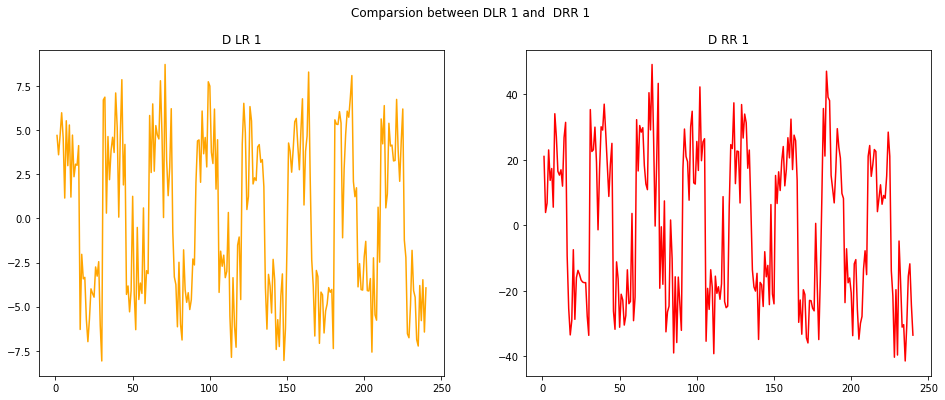

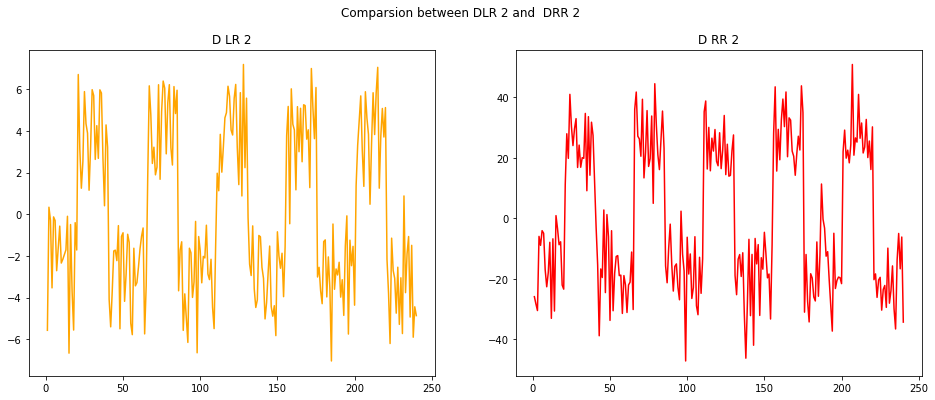

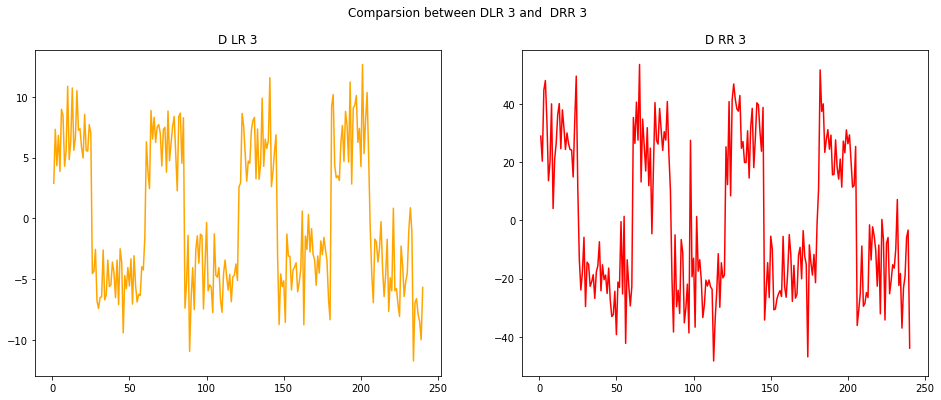

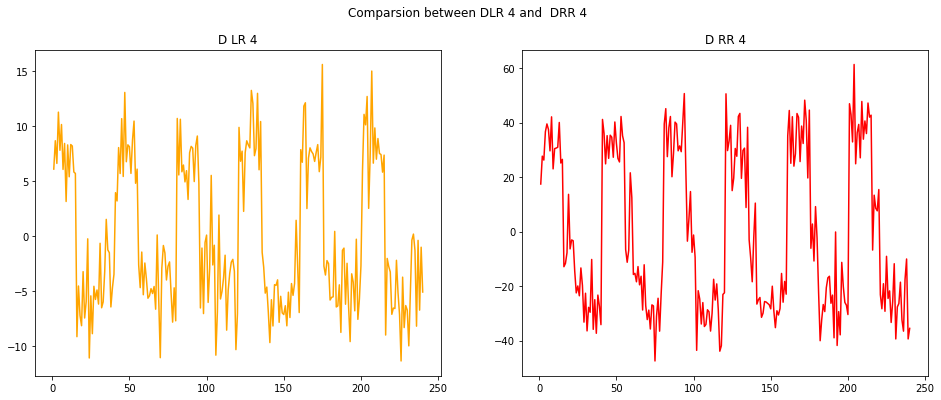

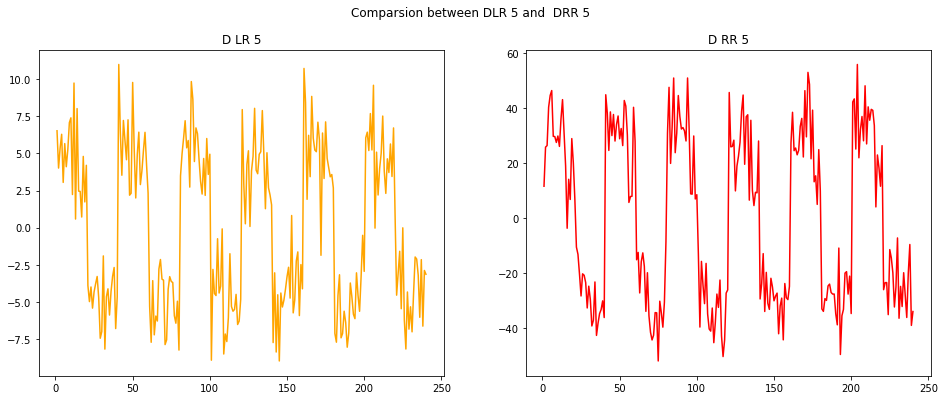

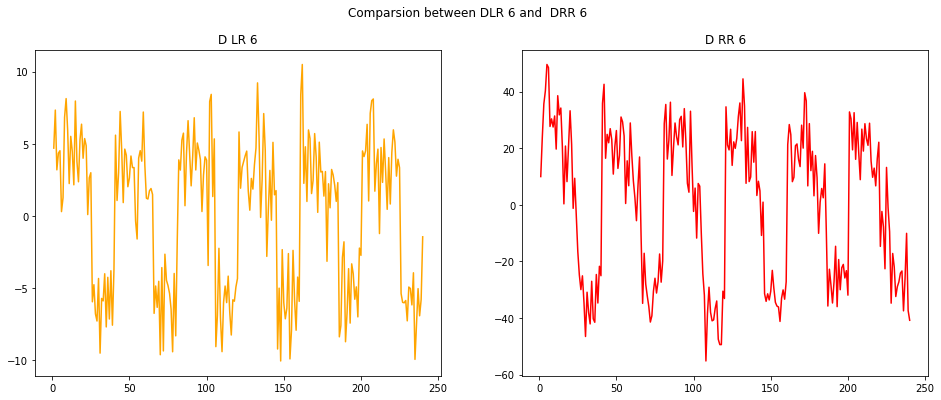

In [110]:
x = [i+1 for i in range(240)]
for i in range(6):
    fig, ax = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between DLR "  +str(i+1) +  " and  DRR " + str(i+1))
    ax[0].plot(x,D_LR[i], color = "orange")
    ax[1].plot(x,D_RR.iloc[:,i],color = "red")
    ax[0].set_title("D LR " + str(i+1))
    ax[1].set_title("D RR " + str(i + 1))
    fig.show()

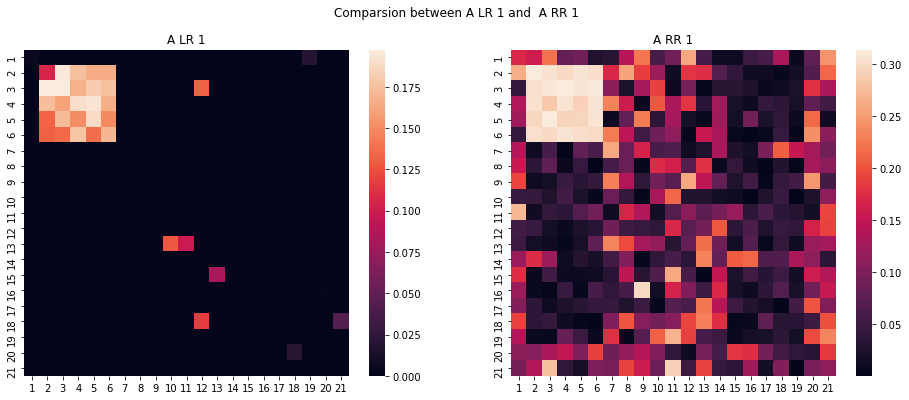

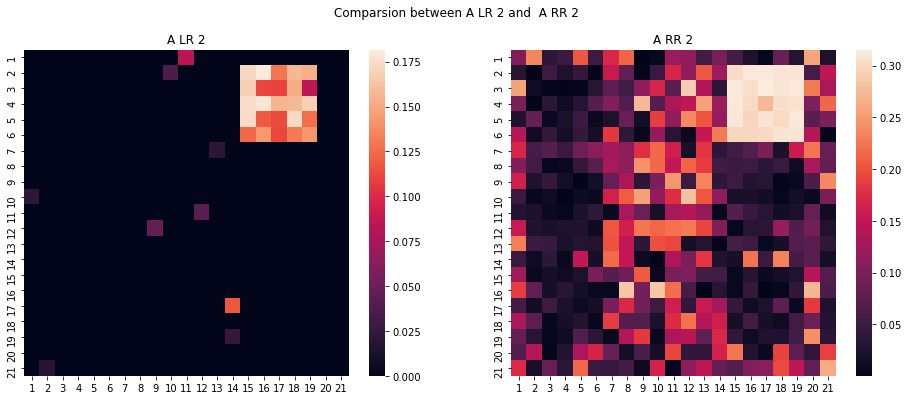

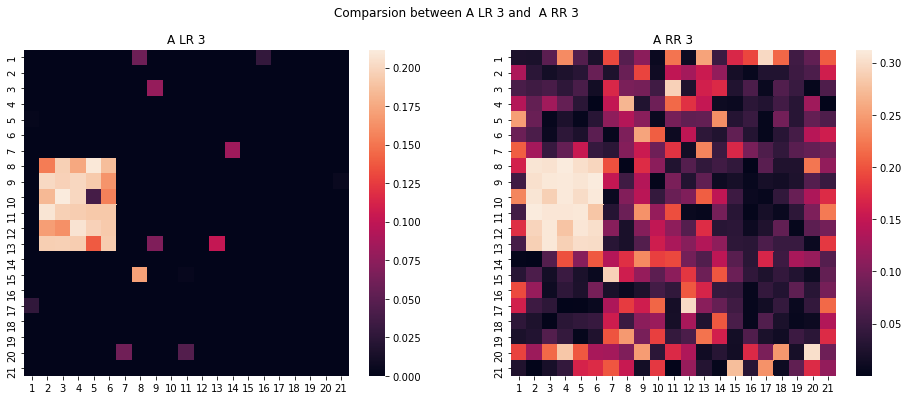

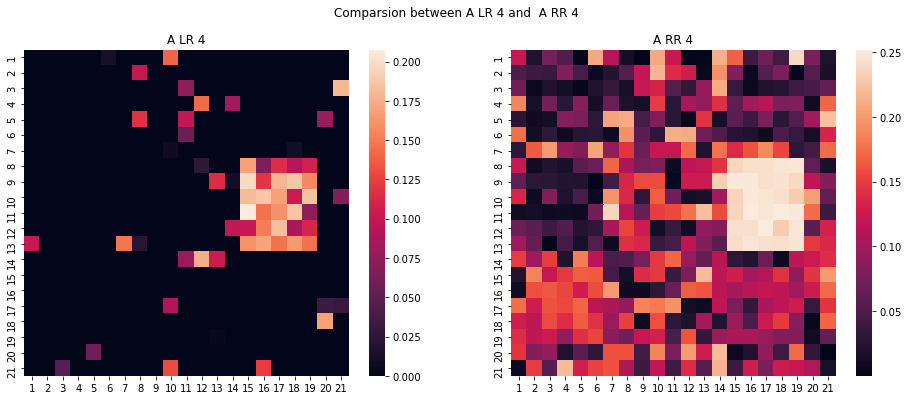

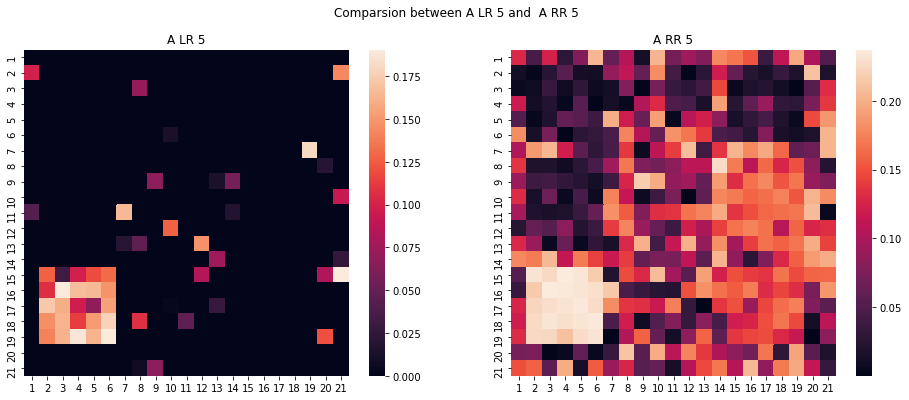

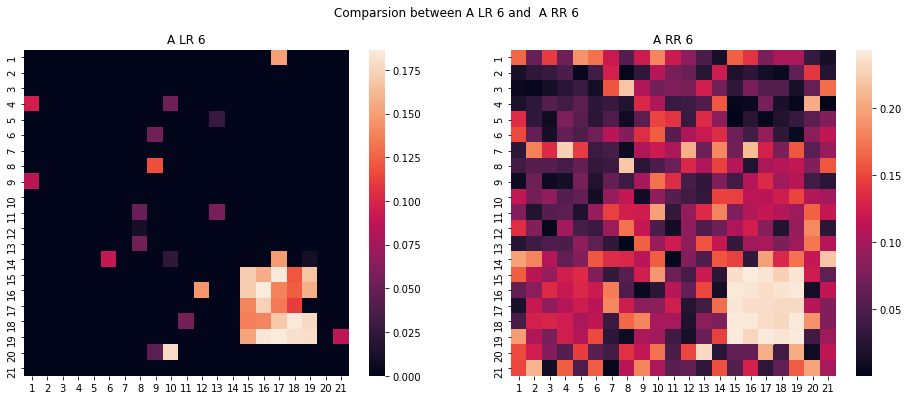

In [111]:
x = [i+1 for i in range(21)]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between A LR "  +str(i+1) +  " and  A RR " + str(i+1))
    sns.heatmap(abs(np.reshape(A_LR[i], (21,21))).transpose(),yticklabels=x,xticklabels=x,ax =ax1)
    sns.heatmap(abs(np.reshape(np.array(A_RR)[i],(21,21))).transpose(),yticklabels = x, xticklabels = x,ax = ax2)
    ax1.set_title("A LR " + str(i+1))
    ax2.set_title("A RR " + str(i + 1))
    fig.show()

### In estimated A_LR, many pixel values are now equal to zero and the retrieved Spatial Map obtained from Lasso Regression are much clearer as the noise data we once added to the X has been filtered out to zero.
### The direct result of this is that the number of false positive has been greatly reduced on the retrieved spatial map.

## 2.5

In [112]:
data_frame_time_courses.shape

(240, 6)

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
PCs = pca.fit_transform(data_frame_time_courses)

In [114]:
for eigenvector in pca.components_:
    print(eigenvector)

[ 0.07547725 -0.00182036  0.07644906  0.55928169  0.59912548  0.56276821]
[ 0.65622983 -0.23060954  0.69510789 -0.09419415 -0.14242208  0.06204901]
[ 0.27383063  0.9228611   0.08033206  0.17961053 -0.03861215 -0.18204424]
[-0.69491023  0.15452469  0.70146127 -0.02395617 -0.00205921  0.02440991]
[ 0.02352637  0.26694917 -0.0822161  -0.68756474  0.02130854  0.66949671]
[-0.07230956  0.00189375 -0.07563011  0.41563487 -0.78664821  0.4443873 ]


In [115]:
eigenvalues = pca.explained_variance_

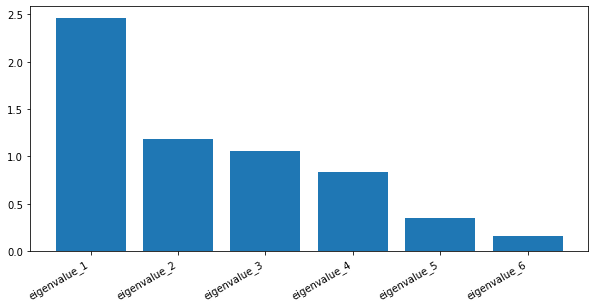

In [116]:
x = ["eigenvalue_1","eigenvalue_2","eigenvalue_3","eigenvalue_4","eigenvalue_5","eigenvalue_6"]
fig = plt.figure(figsize = (10,5))
plt.bar(x,eigenvalues)
fig.autofmt_xdate()

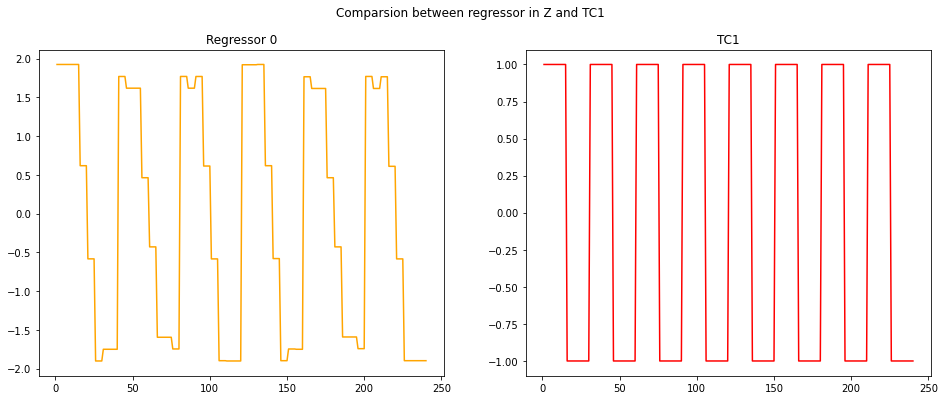

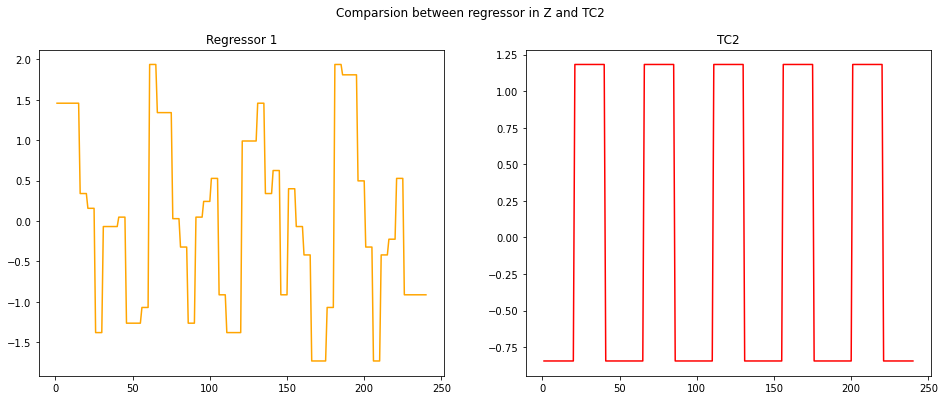

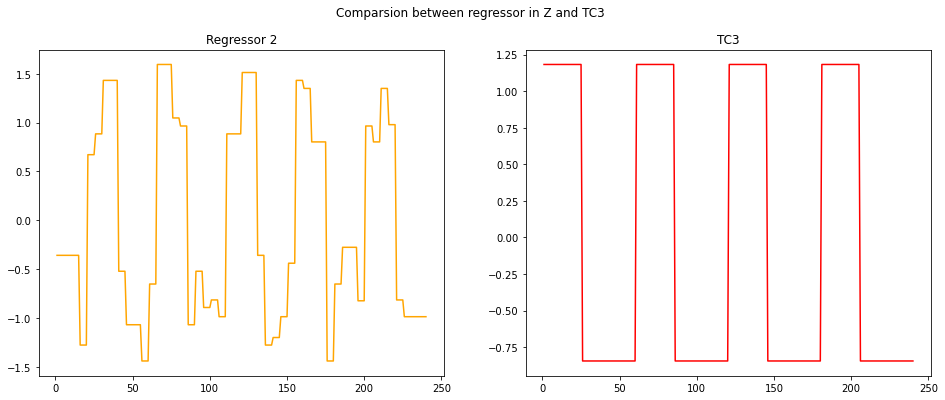

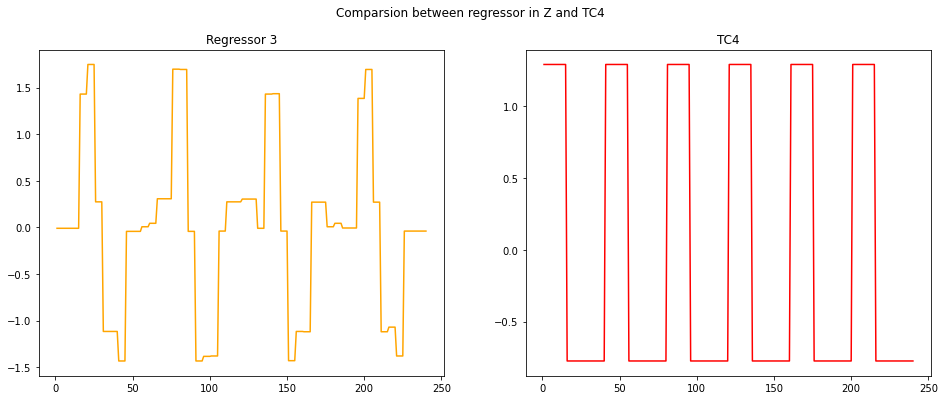

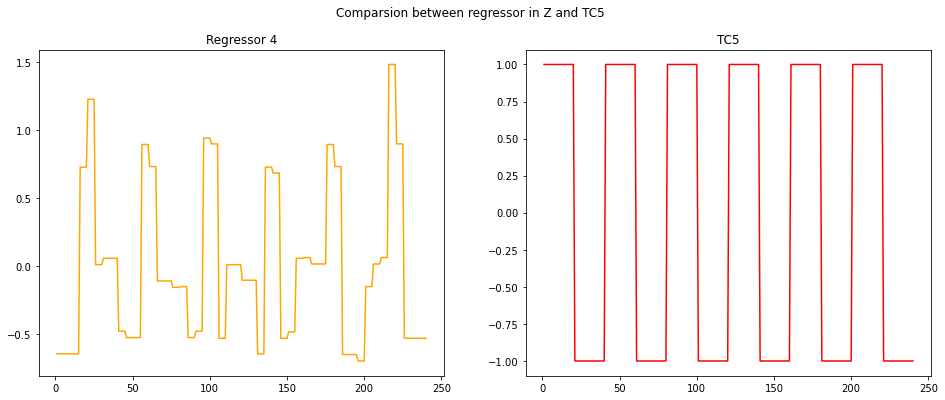

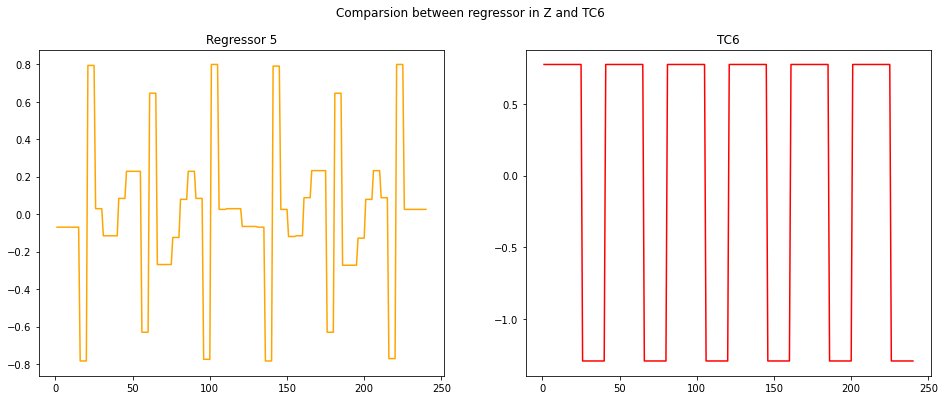

In [117]:
x = [i+1 for i in range(240)]
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
for i in range(6):
    fig, ax = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between regressor in Z and "  + name_list[i])
    ax[0].plot(x,PCs.T[i], color = "orange")
    ax[1].plot(x,data_frame_time_courses.iloc[:,i],color = "red")
    ax[0].set_title("Regressor " + str(i))
    ax[1].set_title(name_list[i])
    fig.show()

In [118]:
clf = linear_model.Lasso(alpha=0.001)
clf.fit(PCs,Standardized_X)
A_PCA = clf.coef_.transpose()
D_PCA = np.matmul(Standardized_X,A_PCA.transpose())

In [119]:
print(A_PCA.shape)
print(D_PCA.shape)

(6, 441)
(240, 6)


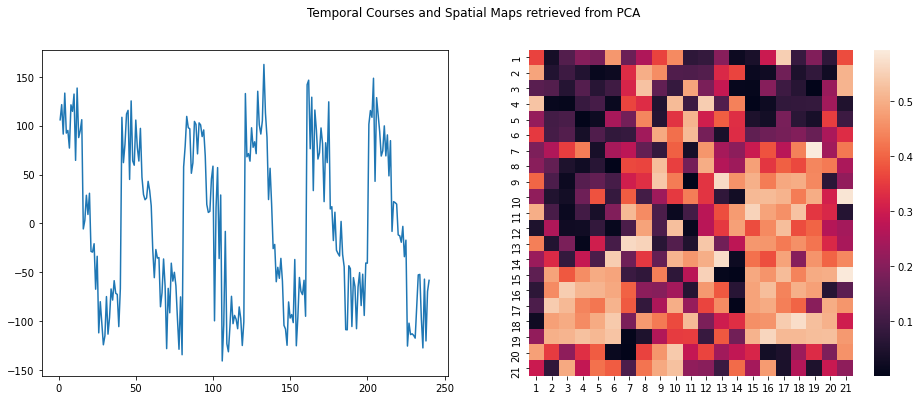

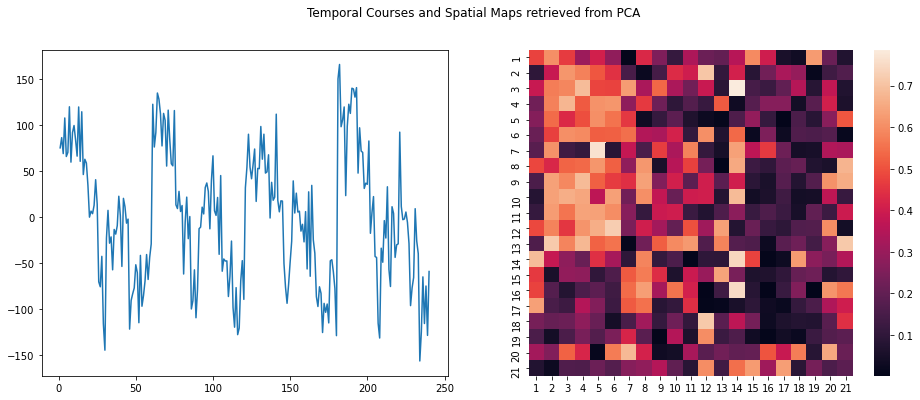

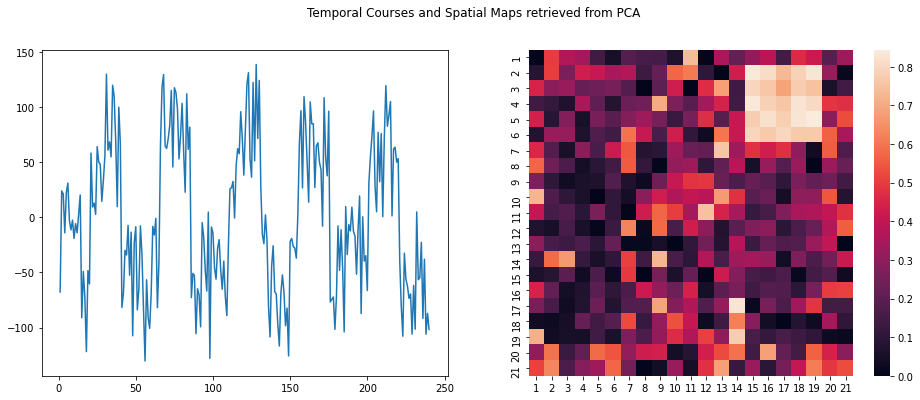

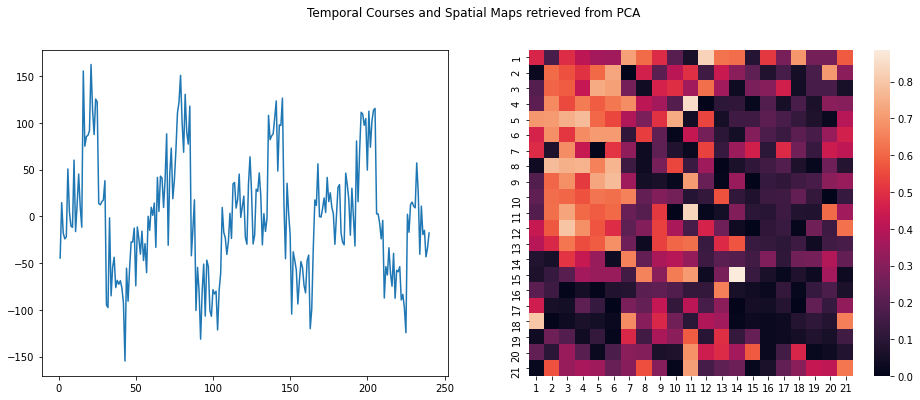

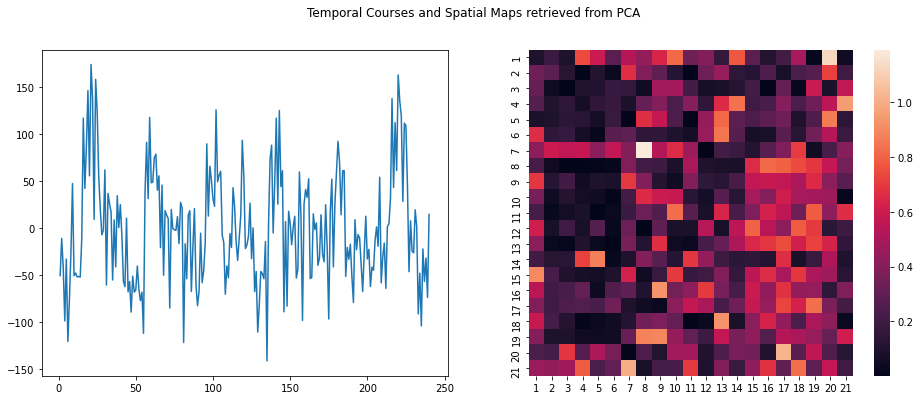

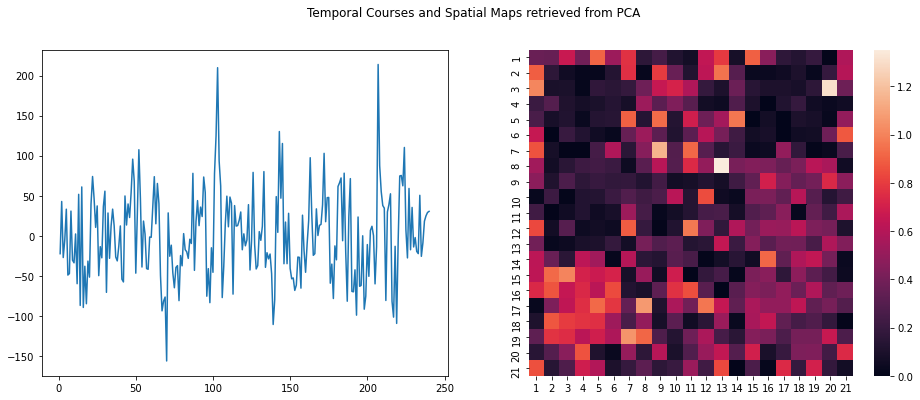

In [120]:
x = [i + 1 for i in range(21)]
x_240 = [i + 1 for i in range(240)]
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    fig.suptitle("Temporal Courses and Spatial Maps retrieved from PCA")
    ax1.plot(x_240,D_PCA[i])
    sns.heatmap(abs(np.reshape(np.array(A_PCA[i]),(21,21))).transpose(),yticklabels = x, xticklabels = x,ax = ax2)
    fig.show()

In [121]:
### The smallest eigenvalue we get here is 6. The PCA 